# 실습 - 도로 표지판 인식하기


## 개요
  - 도로 표지판 이미지를 구분해내는 모델을 만들어 봅시다.

## 목표
  - validation dataset 에 대해 95% 이상의 정확도를 가지는 모델을 만들고자 합니다.


In [22]:
import urllib
import zipfile

import tensorflow as tf

In [23]:
def download_and_extract_data():
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/certificate/germantrafficsigns.zip'
    urllib.request.urlretrieve(url, 'germantrafficsigns.zip')
    with zipfile.ZipFile('germantrafficsigns.zip', 'r') as zip_ref:
        zip_ref.extractall()

download_and_extract_data()

# 1. 이미지 전처리

  - image 전처리를 담당하는 함수를 만들어 봅시다.
  - 간단한 normalize 만 수행해도 충분합니다. 

In [24]:
def preprocess(image, label):
    # 함수 내용을 작성하세요.
    image = image / 255

    return image, label

# 2. 데이터 준비

  - 다운로드 받은 데이터를 읽어서 준비합니다.
  - 위에서 정의한 preprocess 함수를 이용하여 전처리를 수행합니다.
  - 아래 코드는 augmentation 이 적용되지 않았으므로, 원한다면 자유롭게 수정해도 됩니다.
  - (참고) Augmentation 을 수행하지 않아도 목표에 충분히 도달할 수 있습니다.

In [25]:
IMG_SIZE = 30
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='train/',
    label_mode='categorical',
    image_size= (IMG_SIZE,IMG_SIZE)
    , batch_size=BATCH_SIZE)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='validation/',
    label_mode='categorical',
    image_size= (IMG_SIZE,IMG_SIZE)
    , batch_size=BATCH_SIZE)


train_ds = train_ds.map(
        preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE).prefetch(
        tf.data.experimental.AUTOTUNE)
val_ds = val_ds.map(
        preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)

Found 31367 files belonging to 43 classes.
Found 31367 files belonging to 43 classes.
Found 7842 files belonging to 43 classes.
Found 7842 files belonging to 43 classes.


# 3. 모델 정의

  - 모델 모양을 정의합니다.
  - Input, Output 모양을 유의하세요.

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(30, 30, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(43, activation=tf.nn.softmax)
 
])

# 4. 모델 컴파일

  - 학습 방법을 정의하세요
  - loss, optimizer, metrics 를 올바르게 지정하면 충분합니다.

In [27]:
model.compile(
    # 함수 내용을 작성하세요.
    loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']
)

# 5. 모델 학습

  - 학습을 위한 epoch, batch_size 등을 설정하세요.
  - 이 외에 사용하고 싶은 기법들은 자유롭게 도입하셔도 됩니다.

In [28]:
model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=5,
        batch_size=BATCH_SIZE
)

Epoch 1/5
Epoch 1/5
981/981 [==============================] - 68s 68ms/step - loss: 1.2479 - accuracy: 0.6513 - val_loss: 0.3479 - val_accuracy: 0.9051
Epoch 2/5
Epoch 2/5
981/981 [==============================] - 33s 34ms/step - loss: 0.4089 - accuracy: 0.8759 - val_loss: 0.1815 - val_accuracy: 0.9570
Epoch 3/5
Epoch 3/5
981/981 [==============================] - 34s 34ms/step - loss: 0.2838 - accuracy: 0.9142 - val_loss: 0.1323 - val_accuracy: 0.9665
Epoch 4/5
Epoch 4/5
981/981 [==============================] - 34s 34ms/step - loss: 0.2168 - accuracy: 0.9326 - val_loss: 0.1113 - val_accuracy: 0.9694
Epoch 5/5
Epoch 5/5
981/981 [==============================] - 34s 34ms/step - loss: 0.1783 - accuracy: 0.9446 - val_loss: 0.0758 - val_accuracy: 0.9807


# Appendix

- 이미지를 View 합니다.
- model 로 predict 를 합니다.

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Take one batch of images and labels
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='validation/',
    image_size= (IMG_SIZE,IMG_SIZE)
    , batch_size=BATCH_SIZE)

Found 7842 files belonging to 43 classes.
Found 7842 files belonging to 43 classes.


1/1 [==============================] - 0s 22ms/step


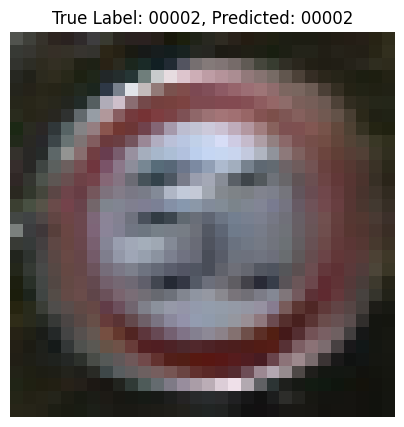

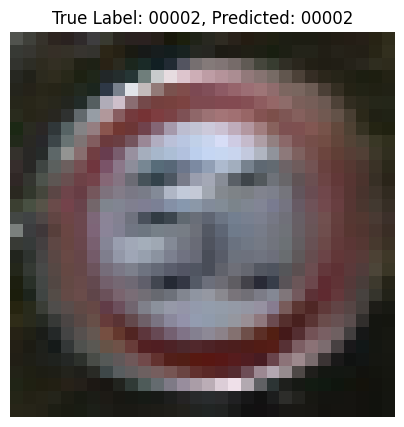

In [34]:
images, labels = next(iter(val_ds.shuffle(buffer_size=10000)))

data_index = 0

selected_image = images[data_index].numpy().astype("uint8")
selected_label = labels[data_index].numpy()

image_to_predict = np.expand_dims(selected_image/255, axis=0)

# Make a prediction
predictions = model.predict(image_to_predict)
predicted_label = np.argmax(predictions)

plt.figure(figsize=(5,5))
plt.imshow(selected_image)
class_names = val_ds.class_names
plt.title(f"True Label: {class_names[selected_label]}, Predicted: {class_names[predicted_label]}")
plt.axis("off")
plt.show()

In [11]:
# Transfer Learning

In [14]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.14.0
Hub version: 0.14.0
GPU is NOT AVAILABLE
TF version: 2.14.0
Hub version: 0.14.0
GPU is NOT AVAILABLE


In [15]:
#@title

model_name = "mobilenet_v2_100_224" # @param ['efficientnetv2-s', 'efficientnetv2-m', 'efficientnetv2-l', 'efficientnetv2-s-21k', 'efficientnetv2-m-21k', 'efficientnetv2-l-21k', 'efficientnetv2-xl-21k', 'efficientnetv2-b0-21k', 'efficientnetv2-b1-21k', 'efficientnetv2-b2-21k', 'efficientnetv2-b3-21k', 'efficientnetv2-s-21k-ft1k', 'efficientnetv2-m-21k-ft1k', 'efficientnetv2-l-21k-ft1k', 'efficientnetv2-xl-21k-ft1k', 'efficientnetv2-b0-21k-ft1k', 'efficientnetv2-b1-21k-ft1k', 'efficientnetv2-b2-21k-ft1k', 'efficientnetv2-b3-21k-ft1k', 'efficientnetv2-b0', 'efficientnetv2-b1', 'efficientnetv2-b2', 'efficientnetv2-b3', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'bit_s-r50x1', 'inception_v3', 'inception_resnet_v2', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224']

model_handle_map = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/2",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/feature_vector/2",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/feature_vector/2",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/2",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/feature_vector/2",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/feature_vector/2",
  "efficientnetv2-xl-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2",
  "efficientnetv2-b0-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/feature_vector/2",
  "efficientnetv2-b1-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/feature_vector/2",
  "efficientnetv2-b2-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b2/feature_vector/2",
  "efficientnetv2-b3-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b3/feature_vector/2",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/feature_vector/2",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/feature_vector/2",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/feature_vector/2",
  "efficientnetv2-xl-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_xl/feature_vector/2",
  "efficientnetv2-b0-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2",
  "efficientnetv2-b1-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b1/feature_vector/2",
  "efficientnetv2-b2-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/feature_vector/2",
  "efficientnetv2-b3-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/feature_vector/2",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/feature_vector/2",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/feature_vector/2",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/feature_vector/2",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature-vector/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature-vector/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/feature-vector/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/feature-vector/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/feature-vector/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/feature-vector/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/feature-vector/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/feature-vector/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
}

model_image_size_map = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-xl-21k": 512,
  "efficientnetv2-b0-21k": 224,
  "efficientnetv2-b1-21k": 240,
  "efficientnetv2-b2-21k": 260,
  "efficientnetv2-b3-21k": 300,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-xl-21k-ft1k": 512,
  "efficientnetv2-b0-21k-ft1k": 224,
  "efficientnetv2-b1-21k-ft1k": 240,
  "efficientnetv2-b2-21k-ft1k": 260,
  "efficientnetv2-b3-21k-ft1k": 300,
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "nasnet_large": 331,
  "pnasnet_large": 331,
}

model_handle = model_handle_map.get(model_name)
pixels = model_image_size_map.get(model_name, 224)

print(f"Selected model: {model_name} : {model_handle}")

IMAGE_SIZE = (pixels, pixels)
print(f"Input size {IMAGE_SIZE}")

BATCH_SIZE = 16#@param {type:"integer"}
do_fine_tuning = False #@param {type:"boolean"}

Selected model: mobilenet_v2_100_224 : https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4
Input size (224, 224)
Selected model: mobilenet_v2_100_224 : https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4
Input size (224, 224)


In [16]:
print("Building model with", model_handle)
model = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(model_handle, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(43)
])
model.build((None,)+IMAGE_SIZE+(3,))
model.summary()

model.compile(
  optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9),
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4
Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4
Model: "sequential_1"
Model: "sequential_1"
_________________________________________________________________
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              2257984   
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
                                              

In [17]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='train/',
    label_mode='categorical',
    image_size= IMAGE_SIZE
    , batch_size=BATCH_SIZE)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='validation/',
    label_mode='categorical',
    image_size= IMAGE_SIZE
    , batch_size=BATCH_SIZE)


train_ds = train_ds.map(
        preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE).prefetch(
        tf.data.experimental.AUTOTUNE)
val_ds = val_ds.map(
        preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)

Found 31367 files belonging to 43 classes.
Found 31367 files belonging to 43 classes.
Found 7842 files belonging to 43 classes.
Found 7842 files belonging to 43 classes.


In [18]:
hist = model.fit(
    train_ds,
    epochs=5,
    validation_data=val_ds).history

Epoch 1/5
Epoch 1/5
1961/1961 [==============================] - 761s 381ms/step - loss: 1.7263 - accuracy: 0.6682 - val_loss: 1.4180 - val_accuracy: 0.7701
Epoch 2/5
Epoch 2/5
1961/1961 [==============================] - 681s 347ms/step - loss: 1.4182 - accuracy: 0.7777 - val_loss: 1.3598 - val_accuracy: 0.7958
Epoch 3/5
Epoch 3/5
1961/1961 [==============================] - 678s 345ms/step - loss: 1.3549 - accuracy: 0.8024 - val_loss: 1.2578 - val_accuracy: 0.8322
Epoch 4/5
Epoch 4/5
1961/1961 [==============================] - 674s 344ms/step - loss: 1.3153 - accuracy: 0.8181 - val_loss: 1.2288 - val_accuracy: 0.8358
Epoch 5/5
Epoch 5/5
1961/1961 [==============================] - 679s 346ms/step - loss: 1.2995 - accuracy: 0.8232 - val_loss: 1.2470 - val_accuracy: 0.8333
